In [6]:
import scripts.eda
print(dir(scripts.eda))


['__builtins__', '__cached__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'pd', 'plot_correlation_matrix', 'plot_distributions', 'plt', 'run_basic_eda', 'sns']


In [2]:
import sys
sys.path.append('/Users/tagesehandiso/insurance_analytics/scripts')


In [3]:
# Cell 1 - Set up Python path to import from scripts
import sys
sys.path.append("..")

# Optional: Auto-reload modules while editing
%load_ext autoreload
%autoreload 2



In [7]:
# Cell 2 - Import required libraries and functions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/Users/tagesehandiso/insurance_analytics/scripts')
from scripts.data_loader import load_data
from scripts.eda import run_basic_eda, plot_distributions, plot_correlation_matrix



In [9]:
file_path = "/Users/tagesehandiso/insurance_analytics/data/MachineLearningRating_v3.txt"
df = load_data(file_path)
df.head()



<string>:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [10]:
# Cell 4 - Run basic EDA summaries
run_basic_eda(df)


First 5 rows:
   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...          

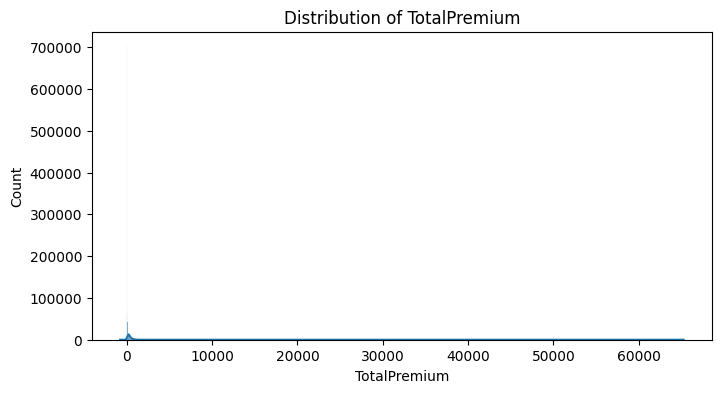

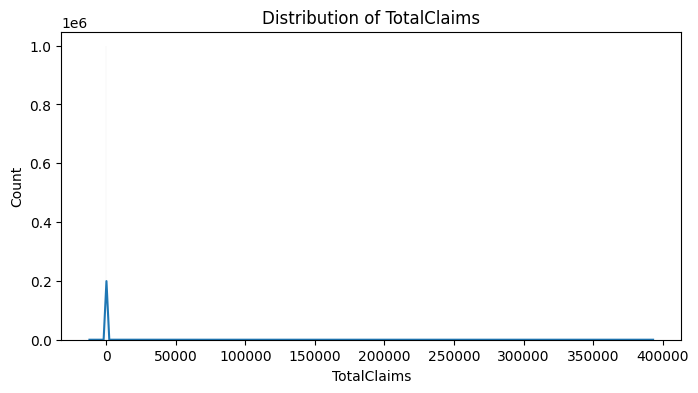

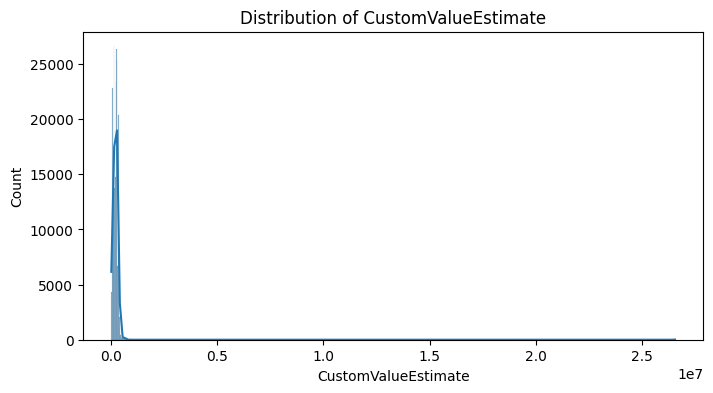

In [11]:
# Cell 5 - Plot distributions of key numerical features
features_to_plot = ["TotalPremium", "TotalClaims", "CustomValueEstimate"]
plot_distributions(df, features_to_plot)


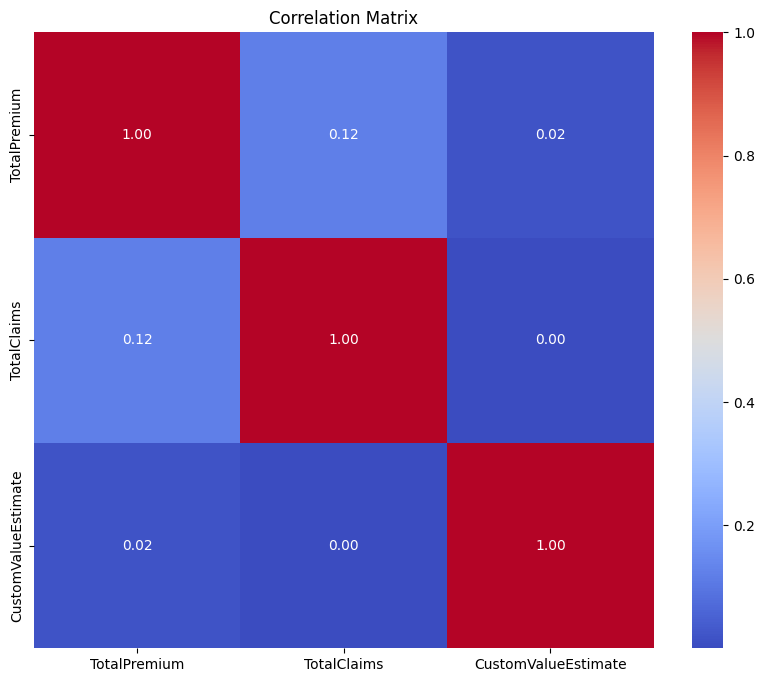

In [13]:
# Cell 6 - Check correlation among important numerical columns
correlation_features = ["TotalPremium", "TotalClaims", "CustomValueEstimate"]
plot_correlation_matrix(df, correlation_features)



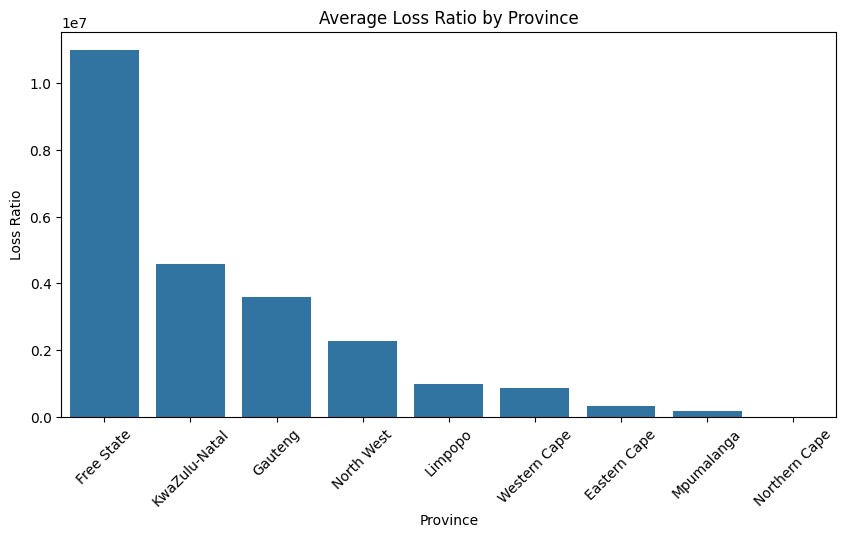

In [14]:
# Cell 7 - Extra: Explore loss ratio by province
df["LossRatio"] = df["TotalClaims"] / (df["TotalPremium"] + 1e-6)
loss_ratio_by_province = df.groupby("Province")["LossRatio"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=loss_ratio_by_province.index, y=loss_ratio_by_province.values)
plt.xticks(rotation=45)
plt.title("Average Loss Ratio by Province")
plt.ylabel("Loss Ratio")
plt.show()


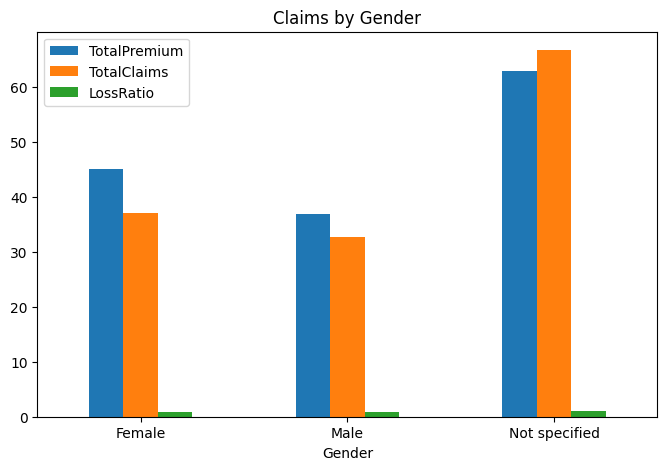

In [15]:
# Cell 8 - Extra: Explore claims by gender
claims_by_gender = df.groupby("Gender")[["TotalPremium", "TotalClaims"]].mean()
claims_by_gender["LossRatio"] = claims_by_gender["TotalClaims"] / (claims_by_gender["TotalPremium"] + 1e-6)

claims_by_gender.plot(kind="bar", figsize=(8, 5), title="Claims by Gender")
plt.xticks(rotation=0)
plt.show()
